In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
import seaborn as sns

In [2]:
data = np.genfromtxt('fluorescence_data.csv', delimiter=',', skip_header=1)
time = data[:, 0]  # Time in minutes
fluorescence = data[:, 1]  # Fluorescence in A.U.
print(f"Number of data points: {len(time)}")

Number of data points: 121


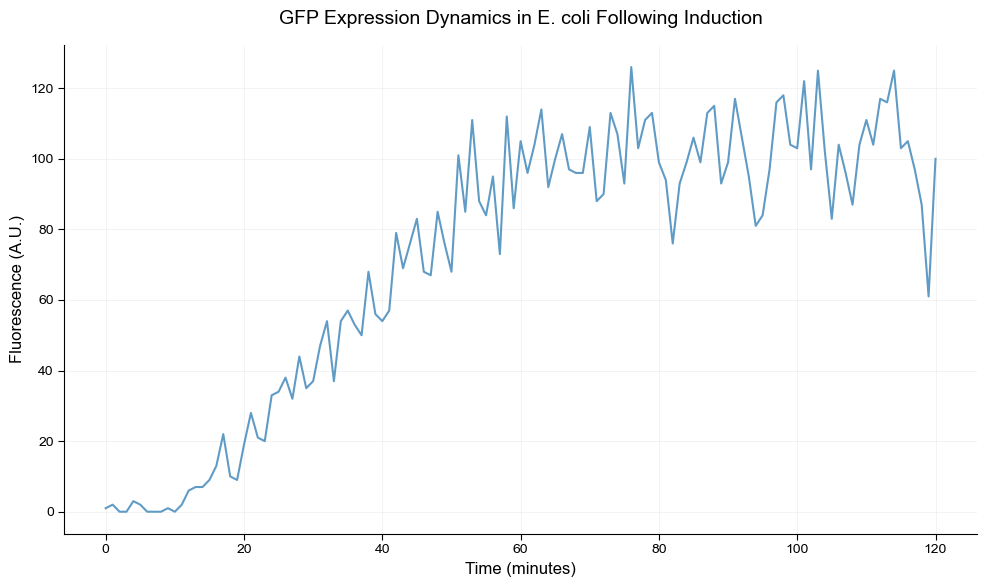

In [3]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 11

fig, ax = plt.subplots(figsize=(10, 6), dpi=100, facecolor='white')

ax.plot(time, fluorescence, color="#3c85b9d0", linewidth=1.5, label='GFP Fluorescence')

ax.set_xlabel('Time (minutes)', fontsize=12)
ax.set_ylabel('Fluorescence (A.U.)', fontsize=12)
ax.set_title('GFP Expression Dynamics in E. coli Following Induction', fontsize=14, pad=15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.8)
ax.spines['bottom'].set_linewidth(0.8)
ax.tick_params(axis='both', which='major', labelsize=10, width=0.8, length=4)
ax.grid(True, alpha=0.2, linestyle='-', linewidth=0.5)
ax.set_facecolor('white')

plt.tight_layout()
plt.show()

In [4]:
# Maximum fluorescence level
max_fluorescence = np.max(fluorescence)
print(f"Maximum fluorescence level: {max_fluorescence:.2f} A.U.")
max_index = np.argmax(fluorescence)
time_at_max = time[max_index]
print(f"Time at maximum: {time_at_max:.1f} minutes")

mask_10_60 = (time >= 10) & (time <= 60)
time_subset = time[mask_10_60]
fluorescence_subset = fluorescence[mask_10_60]

# Rate = (fluorescence at t=60 - fluorescence at t=10) / (60 - 10)
fluor_at_10 = fluorescence_subset[0]
fluor_at_60 = fluorescence_subset[-1]
avg_rate = (fluor_at_60 - fluor_at_10) / (60 - 10)
print(f"Average rate of fluorescence increase between t=10 and t=60 minutes: {avg_rate:.4f} A.U./min")

std_dev = np.std(fluorescence_subset)
print(f"Standard deviation of data between t=10 and t=60 minutes: {std_dev:.2f} A.U.")

Maximum fluorescence level: 126.00 A.U.
Time at maximum: 76.0 minutes
Average rate of fluorescence increase between t=10 and t=60 minutes: 2.1000 A.U./min
Standard deviation of data between t=10 and t=60 minutes: 31.13 A.U.


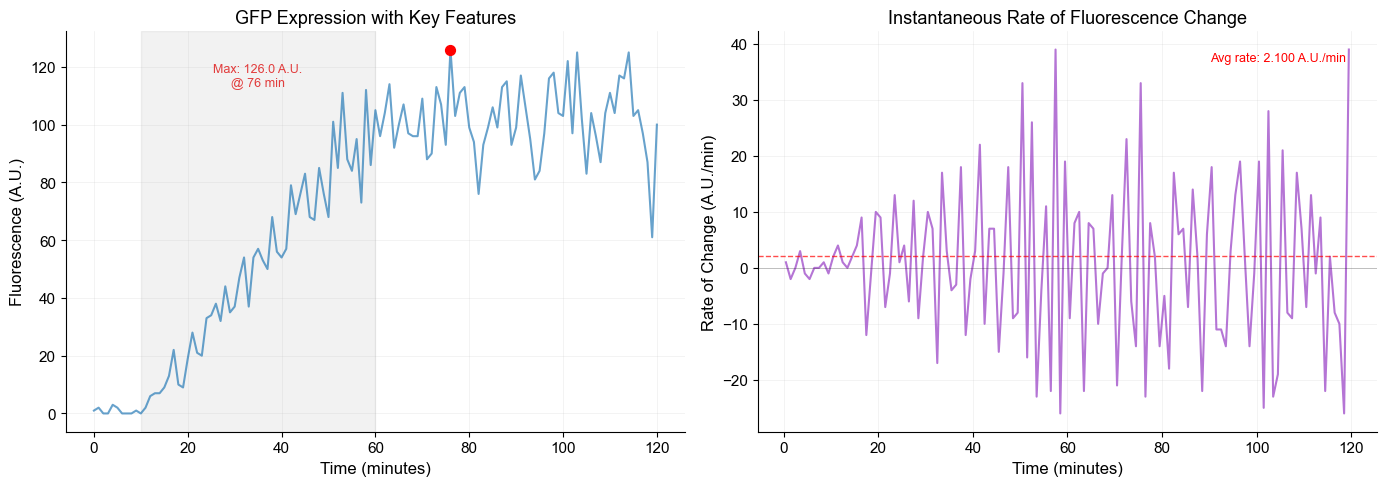

In [5]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 11

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5), dpi=100, facecolor='white')

ax1.plot(time, fluorescence, color="#1c74b3aa", linewidth=1.5)
ax1.scatter(time_at_max, max_fluorescence, color='red', s=50, zorder=5)
ax1.axvspan(10, 60, alpha=0.1, color='gray')
ax1.text(35, max_fluorescence*0.9, f'Max: {max_fluorescence:.1f} A.U.\n@ {time_at_max:.0f} min', 
         fontsize=9, ha='center', color="#E23D3D")

ax1.set_xlabel('Time (minutes)', fontsize=12)
ax1.set_ylabel('Fluorescence (A.U.)', fontsize=12)
ax1.set_title('GFP Expression with Key Features', fontsize=13)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.grid(True, alpha=0.2, linestyle='-', linewidth=0.5)
ax1.set_facecolor('white')

dt = np.diff(time)
df = np.diff(fluorescence)
rate = df / dt
time_mid = (time[:-1] + time[1:]) / 2

ax2.plot(time_mid, rate, color="#9c47c7bf", linewidth=1.5)
ax2.axhline(y=0, color='black', linestyle='-', linewidth=0.5, alpha=0.3)
ax2.axhline(y=avg_rate, color='red', linestyle='--', linewidth=1, alpha=0.7)
ax2.text(0.95, 0.95, f'Avg rate: {avg_rate:.3f} A.U./min', 
         transform=ax2.transAxes, fontsize=9, ha='right', va='top', color='red')

ax2.set_xlabel('Time (minutes)', fontsize=12)
ax2.set_ylabel('Rate of Change (A.U./min)', fontsize=12)
ax2.set_title('Instantaneous Rate of Fluorescence Change', fontsize=13)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.grid(True, alpha=0.2, linestyle='-', linewidth=0.5)
ax2.set_facecolor('white')

plt.tight_layout()
plt.show()